In [108]:
import cv2
from scipy.signal import convolve2d
import numpy as np
import os
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import dctn, idctn
import plotly.graph_objects as go
from tqdm import tqdm

In [109]:
from utils.fonctions import lightDirection, lightsDirection, getI, integrationSCS, stereophotometrie

In [110]:
images = []

#path = "./data/Face_A/rti_JPG/"
path = "./data/tablette/"

file_list = os.listdir(path)
file_list.sort()

for image_path in tqdm(file_list):
    image = cv2.imread(path + image_path)
    ratio = image.shape[0] / image.shape[1]
    #image = cv2.resize(image, (1000, int(1000 * ratio)))
    images.append(image)

100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


In [111]:
images[0].shape

(8256, 5504, 3)

In [112]:
data_str_S = """-0.143535 -0.870519 0.436781
-0.0182196 -0.789764 0.598926
0.10476 -0.876608 0.441328
-0.277307 -0.81273 0.490254
-0.344988 -0.68468 0.631033
-0.153793 -0.729032 0.658295
-0.636234 -0.649061 0.388707
-0.500273 -0.65708 0.544358
-0.450779 -0.777865 0.402021
-0.672652 -0.354292 0.641443
-0.562774 -0.544978 0.60944
-0.717171 -0.517661 0.440563
-0.914095 -0.152036 0.353709
-0.783248 -0.22874 0.568207
-0.834779 -0.386243 0.366104
-0.894341 0.0131428 0.431649
-0.805969 0.127934 0.570615
-0.782604 -0.0640827 0.613052
-0.845953 0.415533 0.306006
-0.829633 0.289327 0.469106
-0.91626 0.194435 0.32277
-0.579454 0.568161 0.577037
-0.718536 0.410259 0.552066
-0.737142 0.533853 0.396982
-0.434555 0.820248 0.342237
-0.496734 0.697766 0.505547
-0.629461 0.685725 0.332623
-0.286566 0.861061 0.393541
-0.157697 0.808637 0.5532
-0.338827 0.736905 0.576243
0.112005 0.921848 0.323934
-0.0124499 0.868748 0.471329
-0.124869 0.919676 0.326819
0.328753 0.720342 0.600705
0.141422 0.807487 0.562094
0.254442 0.861404 0.410208
0.601485 0.701046 0.345191
0.472548 0.691934 0.530826
0.416466 0.821568 0.348409
0.69558 0.534972 0.453151
0.700108 0.407754 0.576554
0.557456 0.555073 0.605023
0.898348 0.194752 0.374413
0.791694 0.286424 0.529015
0.81386 0.432172 0.351135
0.744822 -0.0584267 0.65907
0.775964 0.128795 0.60889
0.873732 0.0173009 0.470793
0.814561 -0.37551 0.418172
0.759491 -0.223407 0.602489
0.889063 -0.144366 0.4154
0.688587 -0.514801 0.496552
0.563538 -0.524935 0.627886
0.649378 -0.34879 0.666353
0.396936 -0.790775 0.438797
0.473476 -0.666485 0.561588
0.601678 -0.658777 0.424959
0.122879 -0.71688 0.678103
0.320965 -0.683816 0.64673
0.244905 -0.818747 0.499434
0.236389 -0.458691 0.852989
0.317922 -0.569097 0.749839
0.129569 -0.613633 0.773143
0.0876919 -0.394456 0.910808
-0.0275842 -0.539625 0.837123
-0.118147 -0.403598 0.905756
-0.147433 -0.620726 0.762121
-0.317832 -0.568172 0.750161
-0.267462 -0.444493 0.85235
-0.370963 -0.356278 0.853059
-0.459749 -0.46904 0.745155
-0.578008 -0.294187 0.754431
-0.373091 -0.186617 0.906538
-0.564389 -0.130231 0.812019
-0.441404 -0.00943347 0.895786
-0.659951 -0.0262494 0.747684
-0.684058 0.164021 0.706544
-0.537822 0.0962508 0.835275
-0.479951 0.27474 0.831498
-0.637537 0.336442 0.688582
-0.50196 0.47808 0.71845
-0.340758 0.310519 0.885475
-0.355937 0.494834 0.790451
-0.163204 0.423143 0.889409
-0.265383 0.630868 0.724837
-0.0914206 0.719465 0.683351
-0.101591 0.559527 0.819217
0.0752016 0.553684 0.826284
0.0850269 0.716046 0.685728
0.245664 0.642777 0.717859
0.162157 0.445804 0.87798
0.339387 0.500525 0.789039
0.319799 0.316884 0.889687
0.494725 0.46951 0.726334
0.60992 0.317755 0.721322
0.489469 0.28035 0.822055
0.532912 0.112556 0.836933
0.664671 0.151452 0.724872
0.648263 -0.0422543 0.75766
0.424346 0.00717234 0.902813
0.539598 -0.153807 0.826041
0.34734 -0.193485 0.914379
0.533806 -0.308981 0.783971
0.449459 -0.456319 0.76027
0.373664 -0.343785 0.860325"""

rows = data_str_S.split('\n')
data = [[float(num) for num in row.split()] for row in rows]

S = np.array(data)
S.shape

(105, 3)

In [113]:
images = images[:30]
S = S[:30, :]

In [114]:
# Pour ./Data/tablette
S = lightsDirection(images, [350, 1760, 1975, 3315])

100%|██████████| 16/16 [00:49<00:00,  3.08s/it]


In [115]:
ratio = images[0].shape[1] / images[0].shape[0]
imagesR = []
imagesG = []
imagesB = []
imagesGray = []


images2 = []
for image in images:
    i = cv2.resize(image, (1000, int(1000 * ratio)))
    imagesR.append(i[:,:,0])
    imagesG.append(i[:,:,1])
    imagesB.append(i[:,:,2])
    imagesGray.append(np.mean(i, axis=2))
    image_ref = i


In [116]:
imagesR[0].shape

(666, 1000)

In [117]:
masque = np.ones(imagesR[0].shape)
exterieur = masque.flatten() == 0
exterieur= np.reshape(exterieur, masque.shape)

In [118]:
I_r = getI(imagesR, corrige=True)
I_g = getI(imagesG, corrige=True)
I_b = getI(imagesB, corrige=True)
I_gray = getI(imagesGray, corrige=True)

In [119]:
def hex_to_rgb(hex_valeur):
    # Assurez-vous que la valeur hexadécimale commence par '#'
    if hex_valeur.startswith('#'):
        hex_valeur = hex_valeur[1:]

    # Vérification de la longueur de la chaîne hexadécimale
    if len(hex_valeur) != 6:
        raise ValueError("La valeur hexadécimale doit être de 6 caractères (sans compter '#')")

    # Extraction des composantes RVB
    rouge = int(hex_valeur[0:2], 16)
    vert = int(hex_valeur[2:4], 16)
    bleu = int(hex_valeur[4:], 16)

    return rouge, vert, bleu

In [120]:
def rgb_to_bgr(rgb):
    return rgb[::-1]

In [121]:
# valeurs pour ./data/Face_A

coords = [
    [122,89,223,188], [255,95,346,184], [385,97,476,185], [515,101,602,185], [641, 97, 730, 187], [768, 103, 855, 184],
    [128,222,213,307], [254,223,344,308], [383,222,475,306], [517,227,598,311], [643,227,729,309], [772,228,852,310],
    [125,352,213,434], [253,348,346,437], [384,350,473,437], [516,354,601,438], [640,354,730,437], [772,358,859,439],
    [122,475,215,564], [255,478,343,564], [381,478,474,565], [515,479,604,566], [643,479,727,564], [766,480,851,565],
] #x1,y1,x2,y2

colors_hex = [
    "#735244", "#c29682", "#627a9d", "#576c43", "#8580b1", "#8580b1",
    "#d67e2c", "#505ba6", "#c15a63", "#5e3c6c", "#9dbc40", "#e0a32e",
    "#383d96", "#469449", "#af363c", "#e7c71f", "#bb5695", "#0885a1",
    "#f3f3f3", "#c8c8c8", "#a0a0a0", "#7a7a7a", "#555555", "#343434"
]


# valeurs pour ./data/tablette

#coords = [[3,213,73,243], [91,212,161,242], [4,252,74,281], [92,252,162,282], [5,291,74,320], [92,290,163,321], [7,330,74,359], [93,330,163,358], [6,370,74,400], [94,370,165,398], [5,410,77,437], [96,407,165,437]]
coords = [[3,213,73,243], [91,212,161,242], [4,252,74,281], [92,252,162,282], [5,291,74,320], [92,290,163,321], [12,335,69,354], [93,330,163,358], [11,375,69,395], [94,370,165,398], [10,415,72,432], [96,407,165,437]]
colors_hex = ["#e0a32e", "#343434", "#bb5695", "#555555", "#e7c71f", "#7a7a7a", "#af363c", "#a0a0a0", "#469449", "#c8c8c8", "#383d96", "#f3f3f3"]

bleu_coords = coords[-2]
vert_coords = coords[-4]
rouge_coords = coords[-6]
bleu_coords

colors = [hex_to_rgb(i) for i in colors_hex]

bleu_rgb = np.array(colors[-2])
vert_rgb = np.array(colors[-4])
rouge_rgb = np.array(colors[-6])


m_reel_r = np.zeros((*masque.shape, 3))
m_reel_g = np.zeros((*masque.shape, 3))
m_reel_b = np.zeros((*masque.shape, 3))

n0 = np.array([0,0,-1])

for coord, color in zip(coords, colors):
    x1,y1,x2,y2 = coord
    r,g,b= color

    m_reel_r[y1:y2, x1:x2] = r * n0
    m_reel_g[y1:y2, x1:x2] = g * n0
    m_reel_b[y1:y2, x1:x2] = b * n0

m_reel_r = m_reel_r.reshape(-1,3)
m_reel_g = m_reel_g.reshape(-1,3)
m_reel_b = m_reel_b.reshape(-1,3)

In [122]:
def metrics(image, coords, colors):
    m = 0

    for coord, color in zip(coords, colors):
        x1,y1,x2,y2 = coord
        r,g,b= color

        m += (np.mean(image[y1:y2, x1:x2, 0]) - r)**2 + (np.mean(image[y1:y2, x1:x2, 1]) - g)**2 + (np.mean(image[y1:y2, x1:x2, 2]) - b)**2

    return m / len(coords)

In [123]:
def stereophotometrie(I,S,masque=None):
    pseudo_inverse_S = np.linalg.pinv(S)
    m = pseudo_inverse_S @ I

    rho_estime = np.sqrt(np.sum(np.square(m), 0))
    N_estime = m / (rho_estime + 1e-3)
    N_estime[:, masque.flatten() == 0] = 0

    return rho_estime, N_estime

In [124]:
def stereophotometrie_(I,S,m_reel,lmb=1,masque=None):
    n = S.shape[0]
    Id = np.ones((n,3))
    A = S.T @ S + lmb * Id.T @ Id
    B = lmb * m_reel.T + S.T @ I

    m = np.linalg.pinv(A) @ B

    rho_estime = np.sqrt(np.sum(np.square(m), 0))
    N_estime = m / (rho_estime + 1e-3)
    N_estime[:, masque.flatten() == 0] = 0

    return rho_estime, N_estime

In [125]:
lmb = 1

rho_estime_r, N_estime_r = stereophotometrie_(I_r, S, m_reel_r, lmb, masque)
rho_estime_g, N_estime_g = stereophotometrie_(I_g, S, m_reel_g, lmb, masque)
rho_estime_b, N_estime_b = stereophotometrie_(I_b, S, m_reel_b, lmb, masque)
rho_estime_gray, N_estime_gray = stereophotometrie(I_gray, S, masque)

In [126]:
rho_estime_r = 255 * (rho_estime_r - np.min(rho_estime_r)) / (np.max(rho_estime_r) - np.min(rho_estime_r))
rho_estime_g = 255 * (rho_estime_g - np.min(rho_estime_g)) / (np.max(rho_estime_g) - np.min(rho_estime_g))
rho_estime_b = 255 * (rho_estime_b - np.min(rho_estime_b)) / (np.max(rho_estime_b) - np.min(rho_estime_b))

In [127]:
np.max(rho_estime_r), np.min(rho_estime_r), np.max(rho_estime_g), np.min(rho_estime_g), np.max(rho_estime_b), np.min(rho_estime_b)

(255.0, 0.0, 255.0, 0.0, 255.00000000000003, 0.0)

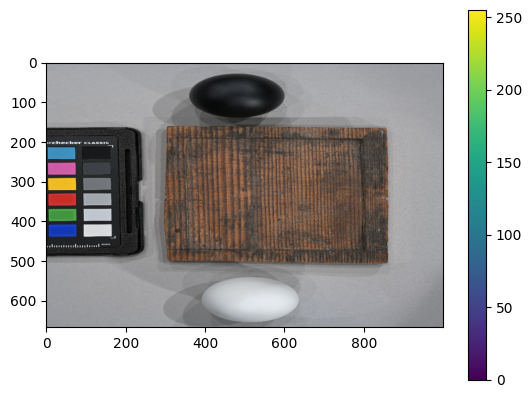

In [128]:
rho_estime_r = rho_estime_r.reshape(masque.shape).astype(np.uint8)
rho_estime_g = rho_estime_g.reshape(masque.shape).astype(np.uint8)
rho_estime_b = rho_estime_b.reshape(masque.shape).astype(np.uint8)

lmd_r = 1
lmd_g = 1
lmd_b = 1

rho_estime_color = np.stack((lmd_b * rho_estime_b, lmd_g * rho_estime_g, lmd_r * rho_estime_r), axis=-1)
plt.imshow((rho_estime_color).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences
plt.colorbar()  # Ajout d'une barre de couleur pour indiquer l'échelle
plt.show()

In [129]:
def color_mediane(image, coords):
    m = []

    for coord in coords:
        x1,y1,x2,y2 = coord

        m.append([np.mean(image[y1:y2, x1:x2, 0]), np.mean(image[y1:y2, x1:x2, 1]), (np.mean(image[y1:y2, x1:x2, 2]))])

    return np.array(m) 

In [130]:
m_color = color_mediane(rho_estime_color, coords)
m_color

array([[ 60.75761905, 138.26809524, 183.38      ],
       [ 23.4547619 ,  25.3852381 ,  26.88095238],
       [198.54334975,  89.62906404, 159.508867  ],
       [ 60.6252381 ,  64.67      ,  69.00904762],
       [235.39730135, 185.17591204,  35.46876562],
       [109.29350295, 112.26578828, 117.49250341],
       [200.26131117,  46.33518006,  37.60295476],
       [160.01020408, 165.43673469, 172.15816327],
       [ 66.08103448, 148.55      ,  65.61551724],
       [190.85513078, 197.64637827, 205.05382294],
       [ 16.54079696,  56.25426945, 185.09867173],
       [208.96135266, 211.16666667, 213.64251208]])

In [131]:
m_bleu = m_color[-2,:]
m_vert = m_color[-4,:]
m_rouge = m_color[-6,:]

In [133]:
m_bleu = rho_estime_color[(bleu_coords[1]+bleu_coords[3])//2, (bleu_coords[0]+bleu_coords[2])//2]
m_vert = rho_estime_color[(vert_coords[1]+vert_coords[3])//2, (vert_coords[0]+vert_coords[2])//2]
m_rouge = rho_estime_color[(rouge_coords[1]+rouge_coords[3])//2, (rouge_coords[0]+rouge_coords[2])//2]

In [134]:
print(m_bleu)

[ 16  55 183]


In [135]:
bgr_stereo = np.stack((m_bleu, m_vert, m_rouge), axis=-1)
bgr_stereo = bgr_stereo[::-1,:]
print(bgr_stereo)

[[183  66  38]
 [ 55 149  46]
 [ 16  66 200]]


In [136]:
bgr_original = np.stack((bleu_rgb, vert_rgb, rouge_rgb), axis=-1)
#Inverser l'ordre des lignes pour que les couleurs soient dans le bon ordre
bgr_original = bgr_original[::-1,:]
print(bgr_original)

[[150  73  60]
 [ 61 148  54]
 [ 56  70 175]]


In [137]:
print(rho_estime_color[1,1,:])

[164 166 171]


In [138]:
det_rgb = np.linalg.det(bgr_original)
det_mbgr = np.linalg.det(bgr_stereo)
lambdas = np.zeros(rho_estime_color.shape)
for i in range(rho_estime_color.shape[0]):
    for j in range(rho_estime_color.shape[1]):
        MB = np.stack((rho_estime_color[i,j,:], m_vert[::-1], m_rouge[::-1]), axis=-1)
        MG = np.stack((m_bleu[::-1], rho_estime_color[i,j,:], m_rouge[::-1]), axis=-1)
        MR = np.stack((m_bleu[::-1], m_vert[::-1], rho_estime_color[i,j,:]), axis=-1)
        lambdas[i,j,0] = np.linalg.det(MB) / det_mbgr
        lambdas[i,j,1] = np.linalg.det(MG) / det_mbgr
        lambdas[i,j,2] = np.linalg.det(MR) / det_mbgr

val1 = lambdas[1,1,0]*m_bleu[::-1] + lambdas[1,1,1]*m_vert[::-1]+ lambdas[1,1,2]*m_rouge[::-1]
print(val1)

[164. 166. 171.]


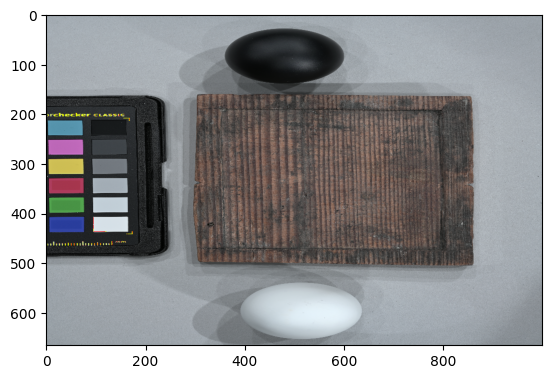

In [139]:
rho_estime_color_corrige = np.zeros(rho_estime_color.shape)
for i in range(rho_estime_color.shape[0]):
    for j in range(rho_estime_color.shape[1]):
        rho_estime_color_corrige[i,j,:] = lambdas[i,j,0]*bleu_rgb[::-1] + lambdas[i,j,1]*vert_rgb[::-1]+ lambdas[i,j,2]*rouge_rgb[::-1]

plt.imshow((rho_estime_color_corrige).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences

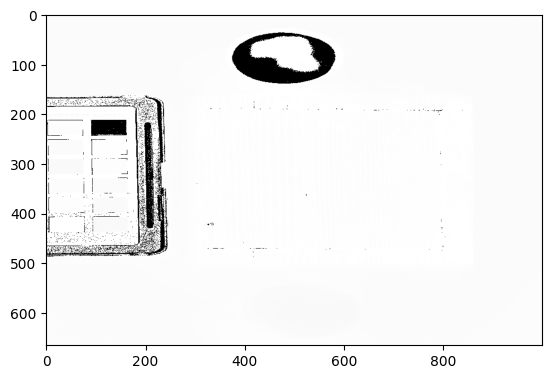

In [147]:
#Afficher la différence entre les deux images rho_estime_color et rho_estime_color_corrige
plt.imshow(np.mean(rho_estime_color - rho_estime_color_corrige, axis=-1).astype(np.uint8), cmap='gray')  # Utilisation de log pour mieux visualiser les différences

In [141]:
print(color_mediane(rho_estime_color_corrige, coords))

[[ 83.453682   142.46114274 166.33613683]
 [ 24.05377031  26.39047721  27.77612218]
 [184.01524133 100.80114875 178.82470985]
 [ 62.03109676  67.29014244  71.4044567 ]
 [204.62441356 188.47130634  84.18678068]
 [110.55002648 116.88879305 122.98784148]
 [165.6204723   54.35832296  78.00642557]
 [161.96007649 172.16364378 180.1771244 ]
 [ 72.97455448 147.55710379  69.70031456]
 [193.16958056 205.6437112  214.66716061]
 [ 42.11213272  62.26526565 157.57752441]
 [209.61970621 219.69610057 226.01404344]]


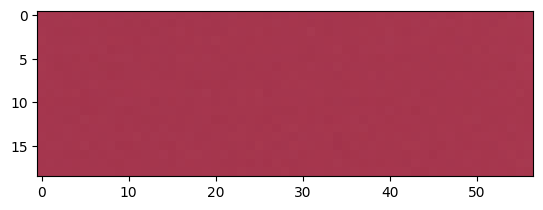

In [142]:
#Extraire les valeurs RGB de l'image de référence aux coordonnées précisées
bleu = rho_estime_color_corrige[bleu_coords[1]:bleu_coords[3], bleu_coords[0]:bleu_coords[2], :]
rouge = rho_estime_color_corrige[rouge_coords[1]:rouge_coords[3], rouge_coords[0]:rouge_coords[2], :]
vert = rho_estime_color_corrige[vert_coords[1]:vert_coords[3], vert_coords[0]:vert_coords[2], :]
#Afficher bleu
plt.imshow((bleu).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences
#Afficher rouge
plt.imshow((rouge).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences
#Afficher vert
#plt.imshow((vert).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences

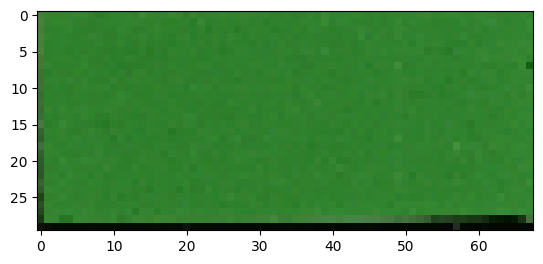

In [ ]:
bleu_original = image_ref[bleu_coords[1]-5:bleu_coords[3]+5, bleu_coords[0]-5:bleu_coords[2]+5, :]
rouge_original = image_ref[rouge_coords[1]-5:rouge_coords[3]+5, rouge_coords[0]-5:rouge_coords[2]+5, :]
vert_original = image_ref[vert_coords[1]-5:vert_coords[3]+5, vert_coords[0]-5:vert_coords[2]+5, :]
#Afficher bleu_original
plt.imshow((bleu_original).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences
#Afficher rouge_original
plt.imshow((rouge_original).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences
#Afficher vert_original
plt.imshow((vert_original).astype(np.uint8))  # Utilisation de log pour mieux visualiser les différences

In [143]:
#Afficher la valeur de lambdas pour la case bleu_coords
print(lambdas[(bleu_coords[1]+bleu_coords[3])//2,(bleu_coords[0]+bleu_coords[2])//2,:])

[-0.15005474  0.1540189   0.87617814]
